# Regressione Lineare con prezzi appartamenti Boston
La regressione lineare è una tecnica molto semplice da realizzare ma ho qualche perplessità sulla bontà dei risultati.
In fondo al foglio ho analizzato i "delta" (errori) sulle predizioni: **sia il test sia il training hanno un errore medio del 18%**.
La **regressione polinomiale** si comporta meglio (**13%**)

## r2_square e interpretazione
Ho scoperto una serie di cose molto importanti su R2:
* R2 non ha una definizione univoca
* sklearn implementa seguendo questa definizione (da manuale): 
    * https://en.wikipedia.org/wiki/Coefficient_of_determination
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 

Confrontando blog, documentazione e esperimenti Python ho notato ALCUNE DISCREPANZE
* nelle trattazioni matematiche, R2 viene considerato come:
    * compreso in [0, 1]
    * monotono crescente al crescere delle variabili di input (o "**predictors**") [blog](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/)
* Tuttavia **questo contrasta con il codice python! **
    * la **documentazione** dice che r2_square può restituire anche **valori negativi** 
    * **elencando i valori di r2 per le diverse configurazioni con i dati di X_test si ha un DECREMENTO dei valori** quando si aggiungono "troppe" variabili

Questo è spiegato nella pagina [Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination):
> There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the **predictions** that are being compared to the corresponding outcomes **have not been derived from a model-fitting procedure using those data**
    
Negli esperimenti qui sotto NON ci sono valori negativi ma si verifica la *diminuzione di R2 all'aumentare nelle variabili*. 
> La cosa è tuttavia corretta perché avviene SOLO quando uso i dati X_test, su cui il modello NON è stato tarato


In [2]:
"""
:Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owner-occupied homes in $1000's",
"""


from sklearn.datasets import load_boston
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
boston = load_boston()
boston01 = scaler.fit_transform(boston.data)

bdf = pd.DataFrame(boston.data, columns = list(boston.feature_names))
bdf01 = pd.DataFrame(boston01, columns = list(boston.feature_names))
bdf["MEDV-Target"] = pd.Series(boston.target)
bdf01["MEDV-Target"] = pd.Series(boston.target)

In [3]:
#bdf.corr()['MEDV-Target'].abs().sort_values(ascending = False)

In [4]:
bdf01.corr()['MEDV-Target'].abs().sort_values(ascending = False)

MEDV-Target    1.000000
LSTAT          0.737663
RM             0.695360
PTRATIO        0.507787
INDUS          0.483725
TAX            0.468536
NOX            0.427321
CRIM           0.388305
RAD            0.381626
AGE            0.376955
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
Name: MEDV-Target, dtype: float64

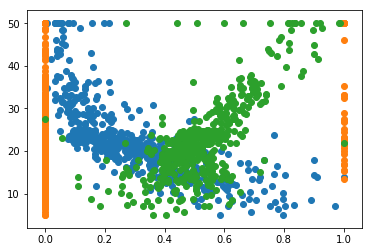

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
target = boston.target
plt.scatter(bdf01['LSTAT'], target)
plt.scatter(bdf01['CHAS'], target)
plt.scatter(bdf01['RM'], target)

In [6]:
names = ['LSTAT']
X = bdf01.loc[:, bdf01.columns.isin(names)].values
Y = bdf01['MEDV-Target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def LReg(df, colNames, estimateTrain=False):
    X = df.loc[:, df.columns.isin(colNames)].values
    Y = df['MEDV-Target'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 1)
    lr = LinearRegression()
    if(estimateTrain == False):
        lr.fit(X_train, Y_train)
        Y_predict = lr.predict(X_test)
        r2score = r2_score(Y_test, Y_predict)
        return X_test, Y_test, Y_predict, r2score
    else:
        lr.fit(X_train, Y_train)
        Y_predict = lr.predict(X_train) #predizione con i dati di test, per controllo
        r2score = r2_score(Y_train, Y_predict)
        return X_train, Y_train, Y_predict, r2score

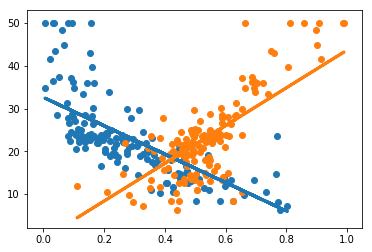

In [8]:
lstat = LReg(bdf01, ['LSTAT'])
plt.scatter(lstat[0], lstat[1])
plt.plot(lstat[0], lstat[2], linewidth=3)

rm = LReg(bdf01, ['RM'])
plt.scatter(rm[0], rm[1])
plt.plot(rm[0], rm[2], linewidth=3)


# chas = LReg(bdf01, ['CHAS'])
# mean squared error: 90.00660291525281
# r2 score: 0.017979307272948164



[0.5349901044757204,
 0.6015774471545623,
 0.6843090583339465,
 0.6044491535687924,
 0.7228623473287099,
 0.7227005600780627,
 0.7256161992233837,
 0.7158352920931133]

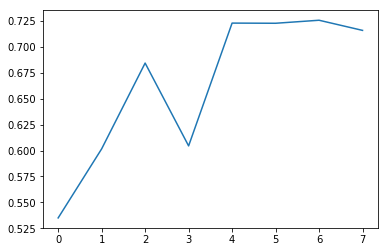

In [67]:

r2s= [ 
    LReg(bdf01, ['LSTAT'])[3] ,
    LReg(bdf01, ['RM'])[3] ,
    LReg(bdf01, ['RM', 'LSTAT'])[3] ,
    LReg(bdf01, ['LSTAT', 'PTRATIO'])[3],
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO'])[3] ,
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS'])[3] ,
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX' ])[3] , #best
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX' ])[3] ,
]

pd.Series(r2s).plot()
r2s

In [53]:
def CalcDiff(Y_test, Y_predict):
    dif = pd.DataFrame(list(zip(Y_test, Y_predict ,Y_predict - Y_test)) , columns = ['Y_test', 'Y_predict', 'delta'] )
    dif['abs-delta'] = dif['delta'].abs()
    dif['rel-delta'] = dif['abs-delta'] / dif['Y_test'] * 100
    print(dif['rel-delta'].describe())
    dif['rel-delta'].plot.hist(bins=50)

In [62]:

r2s_train= [ 
    LReg(bdf01, ['LSTAT'], True)[3] ,
    LReg(bdf01, ['RM'], True)[3] ,
    LReg(bdf01, ['RM', 'LSTAT'], True)[3] ,
    LReg(bdf01, ['LSTAT', 'PTRATIO'], True)[3],
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO'], True)[3] ,
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS'], True)[3] ,
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX' ], True)[3] , #best
    LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX' ], True)[3] 
]

r2s_train

[0.5467486221534437,
 0.4218608782763036,
 0.6099162694401526,
 0.6060176169845812,
 0.6507406702994561,
 0.6508155512216474,
 0.6510539090721245,
 0.6543421282787334]

# Dati di Test

count    152.000000
mean      18.672809
std       17.287837
min        0.146726
25%        7.244617
50%       14.504522
75%       23.977456
max       99.048433
Name: rel-delta, dtype: float64


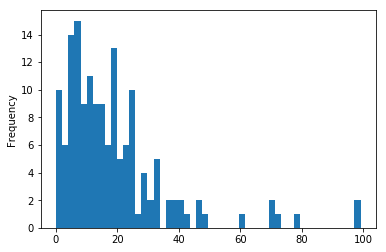

In [54]:
_,Y_test, Y_predict, r2score = LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX' ])
CalcDiff(Y_test, Y_predict)

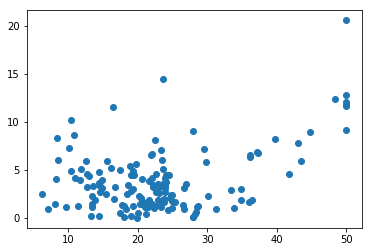

In [11]:
plt.scatter(dif['Y_test'], dif['abs-delta'])

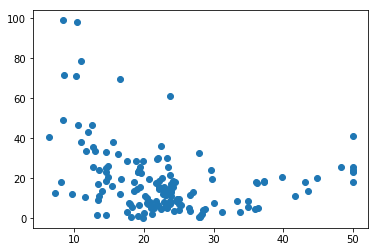

In [12]:
plt.scatter(dif['Y_test'], dif['rel-delta'])

# Dati di Training

count    354.000000
mean      18.615945
std       20.976744
min        0.024712
25%        5.320467
50%       12.391936
75%       23.718375
max      149.862338
Name: rel-delta, dtype: float64


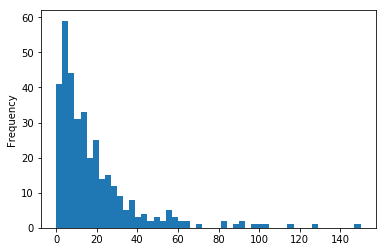

In [55]:
_,Y_test, Y_predict, r2score = LReg(bdf01, ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX' ], True)
CalcDiff(Y_test, Y_predict)

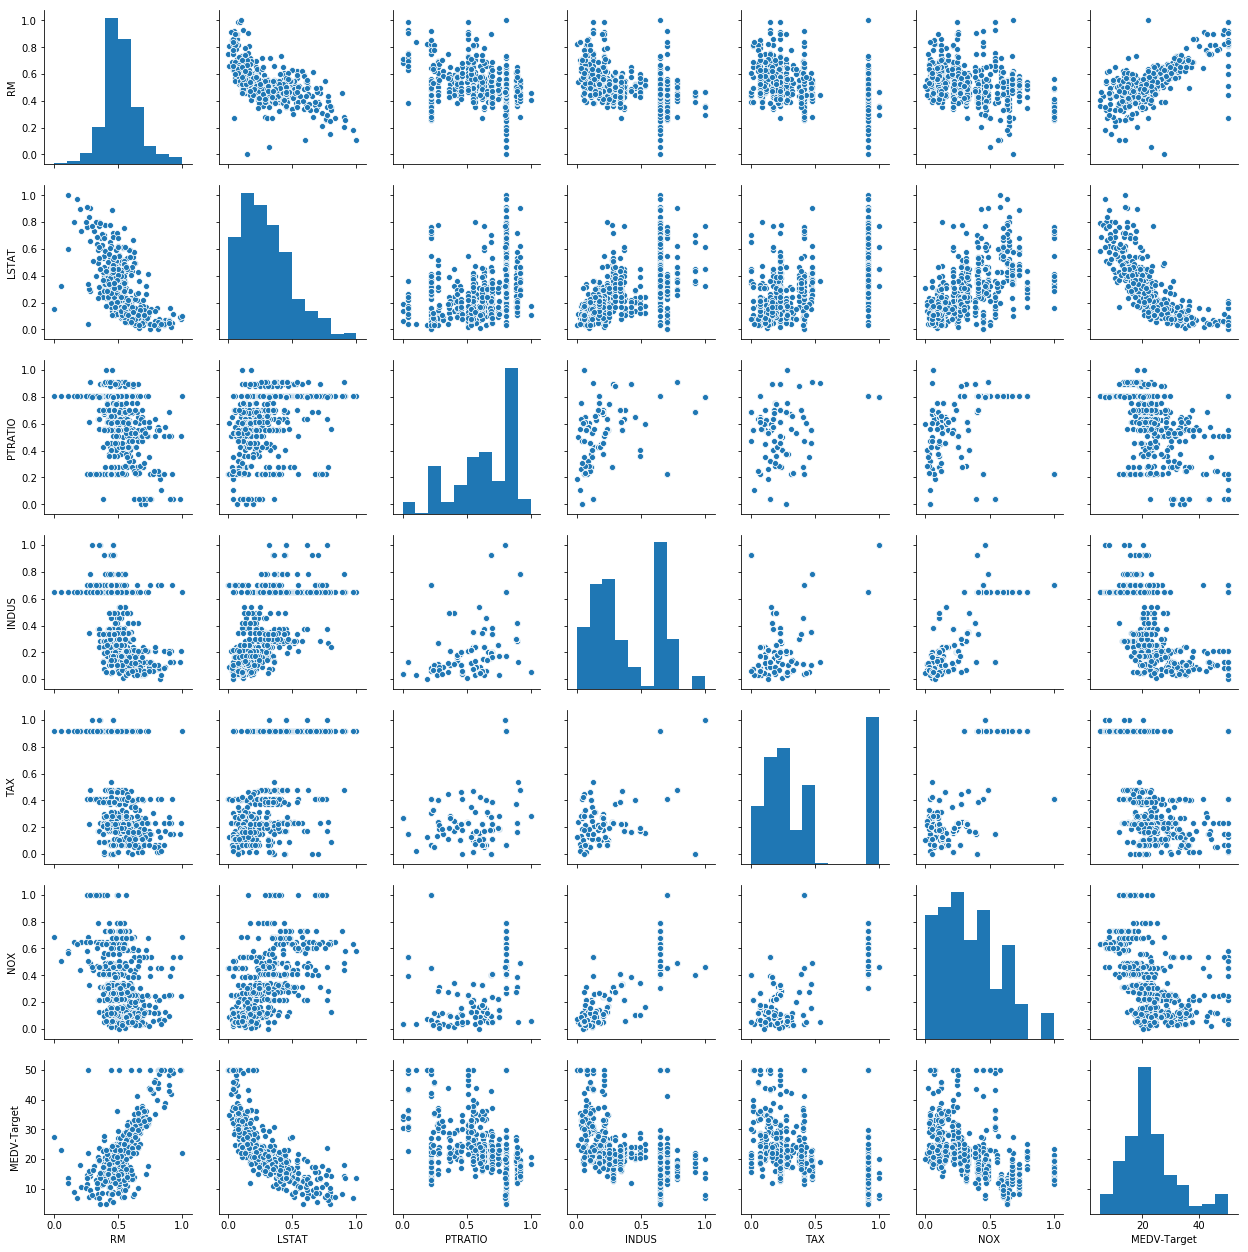

In [14]:
import seaborn as sns
sns.pairplot(bdf01[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'MEDV-Target' ]])

# Provo Polinomiale

0.886148595431177
count    152.000000
mean      13.148508
std       13.247834
min        0.023639
25%        4.835305
50%        9.739974
75%       16.541310
max       82.101033
Name: rel-delta, dtype: float64


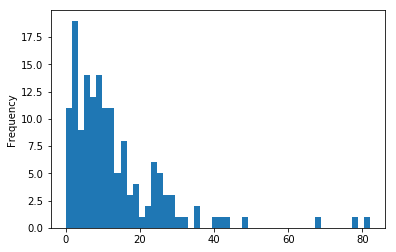

In [59]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


columns = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']
pol = PolynomialFeatures(degree=2)
X = bdf01.loc[:, bdf01.columns.isin(columns)].values
Y = bdf01['MEDV-Target'].values



X_poly = pol.fit_transform(X)
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.3, random_state= 1)
ll = LinearRegression()
ll.fit(X_train_poly, Y_train_poly)
Y_pred_poly = ll.predict(X_test_poly)

print(r2_score(Y_test_poly, Y_pred_poly))
#deg:2 - 0.8892661903514807
#deg:3 - 0.8451715537219284
CalcDiff(Y_test_poly, Y_pred_poly)